Insert Packages

In [72]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score as auc
from sklearn.metrics import fbeta_score

Function

In [73]:
# df_train : train_dataset
# df_test : test_dataset
# n_val : number of validation dataset (1000 ~ 2000)
# o_ratio : oversample ratio at train dataset (0.0~1.0)

def dataset(df_train, df_test, n_val):

  df_train = df_train.drop(['No.'], axis = 1)
  df_test = df_test.drop(['No.'], axis = 1)

  df_train.drop_duplicates(keep='last', inplace=True, ignore_index=True)
  #df_test.drop_duplicates(keep='last', inplace=True, ignore_index=True)

  df_train['Radius'] = np.sqrt(np.power(df_train['X_AXIS'],2) + np.power(df_train['Y_AXIS'], 2))
  df_test['Radius'] = np.sqrt(np.power(df_test['X_AXIS'],2) + np.power(df_test['Y_AXIS'], 2))

  ## G_Group
  df_train['G_over_0'] = (df_train.loc[:, 'G_A':'G_T'] > 0).sum(axis = 1) > 0
  df_train['G_over_0'] = df_train['G_over_0'].astype('int')

  df_test['G_over_0'] = (df_test.loc[:, 'G_A':'G_T'] > 0).sum(axis = 1) > 0
  df_test['G_over_0'] = df_test['G_over_0'].astype('int')

  df_train['G_over_10'] = (df_train.loc[:, 'G_A':'G_T'] > 10).sum(axis = 1) > 0
  df_train['G_over_10'] = df_train['G_over_10'].astype('int')

  df_test['G_over_10'] = (df_test.loc[:, 'G_A':'G_T'] > 10).sum(axis = 1) > 0
  df_test['G_over_10'] = df_test['G_over_10'].astype('int')

  df_train['G_over_20'] = (df_train.loc[:, 'G_A':'G_T'] > 20).sum(axis = 1) > 0
  df_train['G_over_20'] = df_train['G_over_20'].astype('int')

  df_test['G_over_20'] = (df_test.loc[:, 'G_A':'G_T'] > 20).sum(axis = 1) > 0
  df_test['G_over_20'] = df_test['G_over_20'].astype('int')

  df_train['G_over_30'] = (df_train.loc[:, 'G_A':'G_T'] > 30).sum(axis = 1) > 0
  df_train['G_over_30'] = df_train['G_over_30'].astype('int')

  df_test['G_over_30'] = (df_test.loc[:, 'G_A':'G_T'] > 30).sum(axis = 1) > 0
  df_test['G_over_30'] = df_test['G_over_30'].astype('int')

  df_train['G_over_40'] = (df_train.loc[:, 'G_A':'G_T'] > 40).sum(axis = 1) > 0
  df_train['G_over_40'] = df_train['G_over_40'].astype('int')

  df_test['G_over_40'] = (df_test.loc[:, 'G_A':'G_T'] > 40).sum(axis = 1) > 0
  df_test['G_over_40'] = df_test['G_over_40'].astype('int')

  ## Neighbor
  df_train['N_over_1'] = (df_train.loc[:, 'Neighbor_A':'Neighbor_T'] > 1).sum(axis = 1) > 0
  df_train['N_over_1'] = df_train['N_over_1'].astype('int')

  df_test['N_over_1'] = (df_test.loc[:, 'Neighbor_A':'Neighbor_T'] > 1).sum(axis = 1) > 0
  df_test['N_over_1'] = df_test['N_over_1'].astype('int')

  df_train['N_over_3'] = (df_train.loc[:, 'Neighbor_A':'Neighbor_T'] > 3).sum(axis = 1) > 0
  df_train['N_over_3'] = df_train['N_over_3'].astype('int')

  df_test['N_over_3'] = (df_test.loc[:, 'Neighbor_A':'Neighbor_T'] > 3).sum(axis = 1) > 0
  df_test['N_over_3'] = df_test['N_over_3'].astype('int')

  df_train['N_over_5'] = (df_train.loc[:, 'Neighbor_A':'Neighbor_T'] > 5).sum(axis = 1) > 0
  df_train['N_over_5'] = df_train['N_over_5'].astype('int')

  df_test['N_over_5'] = (df_test.loc[:, 'Neighbor_A':'Neighbor_T'] > 5).sum(axis = 1) > 0
  df_test['N_over_5'] = df_test['N_over_5'].astype('int')

  df_train['N_over_7'] = (df_train.loc[:, 'Neighbor_A':'Neighbor_T'] > 7).sum(axis = 1) > 0
  df_train['N_over_7'] = df_train['N_over_7'].astype('int')

  df_test['N_over_7'] = (df_test.loc[:, 'Neighbor_A':'Neighbor_T'] > 7).sum(axis = 1) > 0
  df_test['N_over_7'] = df_test['N_over_7'].astype('int')

  df_train['N_over_9'] = (df_train.loc[:, 'Neighbor_A':'Neighbor_T'] > 9).sum(axis = 1) > 0
  df_train['N_over_9'] = df_train['N_over_9'].astype('int')

  df_test['N_over_9'] = (df_test.loc[:, 'Neighbor_A':'Neighbor_T'] > 9).sum(axis = 1) > 0
  df_test['N_over_9'] = df_test['N_over_9'].astype('int')

  ## Wafer Filter
  temp = df_train[df_train['GRADE_CD'] != "OQ1"]
  
  filter1 = []
  filter2 = []

  for i in np.unique(temp['LOT_ID']):
    temp1 = temp[temp['LOT_ID'] == i]
  
    for j in np.unique(temp1['GRADE_CD']):
      temp2 = temp1[temp1['GRADE_CD'] == j]
    
      for k in np.unique(temp2['WF_ID']):
        temp3 = temp2[temp2['WF_ID'] == k]

        y0 = len(temp3[temp3['PKT_Y'] == 0])
        y1 = len(temp3[temp3['PKT_Y'] == 1])

        percent_fail = y1/(y1+y0)*100
      
        if percent_fail > 80:
          lst1 = [i, j, k]
          filter1.append(lst1)

        elif percent_fail > 70:
          lst2 = [i, j, k]
          filter2.append(lst2)
        
  df_train['Filter_Weight1'] = 0
  df_train['Filter_Weight2'] = 0
  
  df_test['Filter_Weight1'] = 0
  df_test['Filter_Weight2'] = 0

  for i in filter1:
    df_train[(df_train['LOT_ID'] == i[0]) & (df_train['GRADE_CD'] == i[1]) & (df_train['WF_ID'] == i[-1])]['Filter_Weight1'] = 2
    df_test[(df_test['LOT_ID'] == i[0]) & (df_test['GRADE_CD'] == i[1]) & (df_test['WF_ID'] == i[-1])]['Filter_Weight1'] = 2

  for i in filter2:
    df_train[(df_train['LOT_ID'] == i[0]) & (df_train['GRADE_CD'] == i[1]) & (df_train['WF_ID'] == i[-1])]['Filter_Weight2'] = 1
    df_test[(df_test['LOT_ID'] == i[0]) & (df_test['GRADE_CD'] == i[1]) & (df_test['WF_ID'] == i[-1])]['Filter_Weight2'] = 1
  
  df_train['weight'] = (df_train.loc[:, 'G_over_0' : 'Filter_Weight2'].sum(axis = 1))
  df_test['weight'] = (df_test.loc[:, 'G_over_0' : 'Filter_Weight2'].sum(axis = 1))
      
  df_train = pd.get_dummies(data = df_train, columns = ['GRADE_CD'], prefix = 'GRADE_CD')
  df_train = pd.get_dummies(data = df_train, columns = ['LOT_ID'], prefix = 'LOT_ID')
  df_train = pd.get_dummies(data = df_train, columns = ['WF_ID'], prefix = 'WF_ID')

  df_test = pd.get_dummies(data = df_test, columns = ['GRADE_CD'], prefix = 'GRADE_CD')
  df_test = pd.get_dummies(data = df_test, columns = ['LOT_ID'], prefix = 'LOT_ID')
  df_test = pd.get_dummies(data = df_test, columns = ['WF_ID'], prefix = 'WF_ID')

  df_train_0 = df_train[df_train['PKT_Y'] == 0]
  df_train_1 = df_train[df_train['PKT_Y'] == 1]

  ratio_1 = n_val/df_train_1.shape[0]

  X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(df_train_1.drop('PKT_Y', axis = 1), df_train_1.PKT_Y,
                                                    train_size = (1-ratio_1), stratify = df_train_1.PKT_Y,
                                                    random_state = 42)
  
  ratio_0 = y_test_1.shape[0]/df_train_0.shape[0]

  X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(df_train_0.drop('PKT_Y', axis = 1), df_train_0.PKT_Y,
                                                    train_size = (1-ratio_0), stratify = df_train_0.PKT_Y,
                                                    random_state = 42)
  
  X_train = pd.concat([X_train_1, X_train_0], axis = 0)
  X_test = pd.concat([X_test_1, X_test_0], axis = 0)
  y_train = pd.concat([y_train_1, y_train_0], axis = 0)
  y_test = pd.concat([y_test_1, y_test_0], axis = 0)

  df_train = pd.concat([X_train, y_train], axis = 1)

  df_train_0 = df_train[df_train['PKT_Y'] == 0]
  df_train_1 = df_train[df_train['PKT_Y'] == 1]

  n_dup = int(df_train_0.shape[0]/df_train_1.shape[0])

  df_train = pd.concat([df_train, df_train_0], axis = 0, ignore_index=True)

  for i in range(n_dup*8):
    df_train = pd.concat([df_train, df_train_1], axis = 0, ignore_index=True)
  
  X_train = df_train.drop(['PKT_Y'], axis = 1)
  y_train = df_train['PKT_Y']

  col_names = X_train.columns

  X_train.reset_index(drop=True, inplace = True)
  y_train.reset_index(drop=True, inplace = True)
  X_test.reset_index(drop=True, inplace = True)
  y_test.reset_index(drop=True, inplace = True)

  selected_col = ['X_AXIS', 'Y_AXIS', 'Radius', 
  'G_over_0', 'G_over_10', 'G_over_20', 'G_over_30', 'G_over_40', 
  'N_over_1', 'N_over_3','N_over_5', 'N_over_7', 'N_over_9', 
  'Filter_Weight1', 'Filter_Weight2',
  'weight', 
  'GRADE_CD_N1', 'GRADE_CD_NQ', 'GRADE_CD_OQ1', 'GRADE_CD_SQ',
  'LOT_ID_ABC1111', 'LOT_ID_ABC1236', 'LOT_ID_ABC1258',
  'WF_ID_1','WF_ID_2', 'WF_ID_3', 'WF_ID_4', 'WF_ID_5', 
  'WF_ID_6', 'WF_ID_7','WF_ID_8', 'WF_ID_9', 'WF_ID_10', 
  'WF_ID_11', 'WF_ID_12', 'WF_ID_13','WF_ID_14', 'WF_ID_15', 
  'WF_ID_16', 'WF_ID_17', 'WF_ID_18', 'WF_ID_19','WF_ID_20', 
  'WF_ID_21', 'WF_ID_22', 'WF_ID_23', 'WF_ID_24', 'WF_ID_25']

  X_train = X_train.loc[:, selected_col]
  X_test = X_test.loc[:, selected_col]

  X_train_clean = X_train.copy()
  X_test_clean = X_test.copy()

  df_test = df_test.loc[:, selected_col]

  return X_train, X_test, y_train, y_test, df_test

In [74]:
def xgb_helper(PARAMETERS,V_PARAM_NAME=False,V_PARAM_VALUES=False,BR=10):
    
    temp_dmatrix =xgb.DMatrix(data=X_train, label=y_train)
    
    if V_PARAM_VALUES==False:
        cv_results = xgb.cv(dtrain=temp_dmatrix, nfold=5,num_boost_round=BR,params=PARAMETERS, as_pandas=True, seed=123, tree_method='gpu_hist', gpu_id=0)
        return cv_results
    
    else:
        results=[]
        
        for v_param_value in V_PARAM_VALUES:
            PARAMETERS[V_PARAM_NAME]=v_param_value
            cv_results = xgb.cv(dtrain=temp_dmatrix, nfold=5,num_boost_round=BR,params=PARAMETERS, as_pandas=True, seed=123)
            results.append((cv_results["train-auc-mean"].tail().values[-1],cv_results["test-auc-mean"].tail().values[-1]))
            
        data = list(zip(V_PARAM_VALUES, results))
        print(pd.DataFrame(data,columns=[V_PARAM_NAME,"auc"]))
        
        return cv_results

In [75]:
def result(model, X_test, y_test, y_predicted):

  strong_idx = X_test[(X_test['GRADE_CD_OQ1'] == 1)].index
  y_predicted[strong_idx] = 1 

  # Classification Report
  print(classification_report(y_test,y_predicted))

  # Confusion_matrix
  cm = confusion_matrix(y_test, y_predicted)
  names = ['True Neg','False Pos','False Neg','True Pos']
  counts = [value for value in cm.flatten()]
  percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
  labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cm,annot = labels,cmap = 'Blues',fmt ='')

  plot_roc_curve(model, X_test, y_test)
  print(auc(y_test,y_predicted))

  print("F-beta Score")
  print(fbeta_score(y_test, y_predicted, average='binary', beta=2))

In [76]:
def submit(model, df_test):

  y_predicted = model.predict(df_test)
  
  strong_idx = df_test[(df_test['GRADE_CD_OQ1'] == 1)].index
  y_predicted[strong_idx] = 1

  submit_y = pd.DataFrame(y_predicted, columns = ['PKT_Y'])

  #df_test = pd.concat([df_test, submit_y], axis = 1)
  submit_y.to_csv('submit_y.csv')

Dataset

In [77]:
df_train = pd.read_csv("/content/sample_data/challenge_train.csv")
df_test = pd.read_csv("/content/sample_data/challenge_test.csv")

In [66]:
X_train, X_test, y_train, y_test, df_test = dataset(df_train, df_test, n_val = 1000)

EDA

(array([  0.,   0.,   0.,   0.,   0., 178.,   0.,   0.,   0.,   0.]),
 array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5]),
 <a list of 10 Patch objects>)

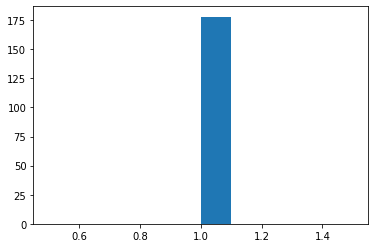

In [117]:
df = df_train[df_train['LOT_ID'] == 'ABC1111']
df = df[df['GRADE_CD'] == 'OQ1']

plt.hist(df['PKT_Y'])

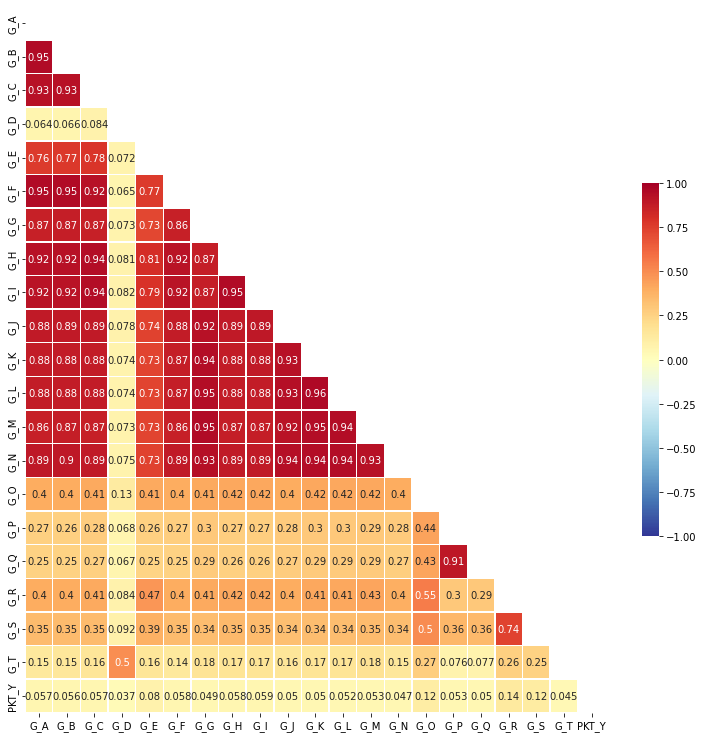

In [108]:
df = pd.concat([df_train.loc[:, 'G_A':'G_T'], df_train['PKT_Y']], axis = 1)

corr = df.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize  = (13, 13))
sns.heatmap(corr, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            mask = mask,
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )

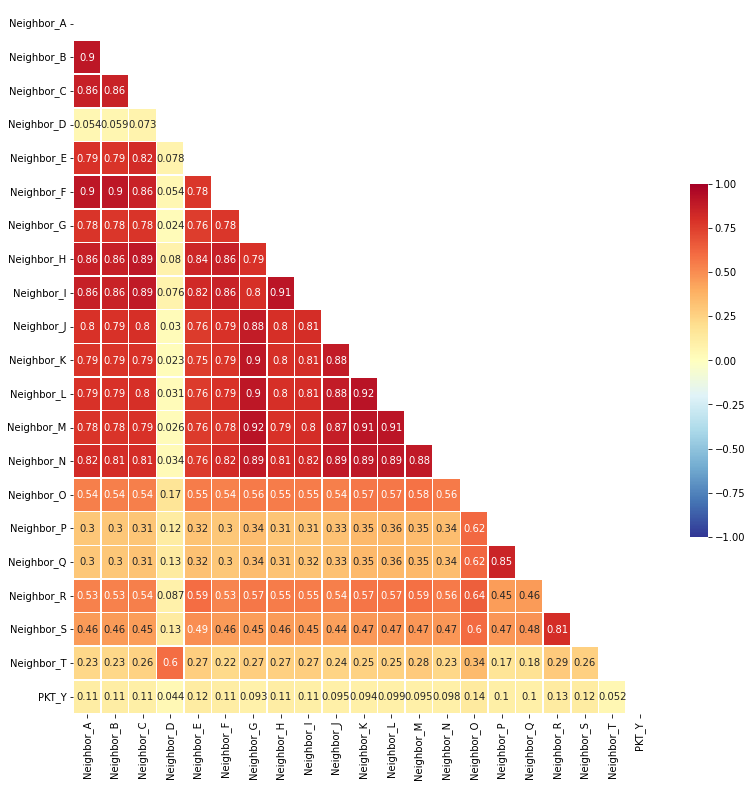

In [111]:
df = pd.concat([df_train.loc[:, 'Neighbor_A':'Neighbor_T'], df_train['PKT_Y']], axis = 1)

corr = df.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize  = (13, 13))
sns.heatmap(corr, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            mask = mask,
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )

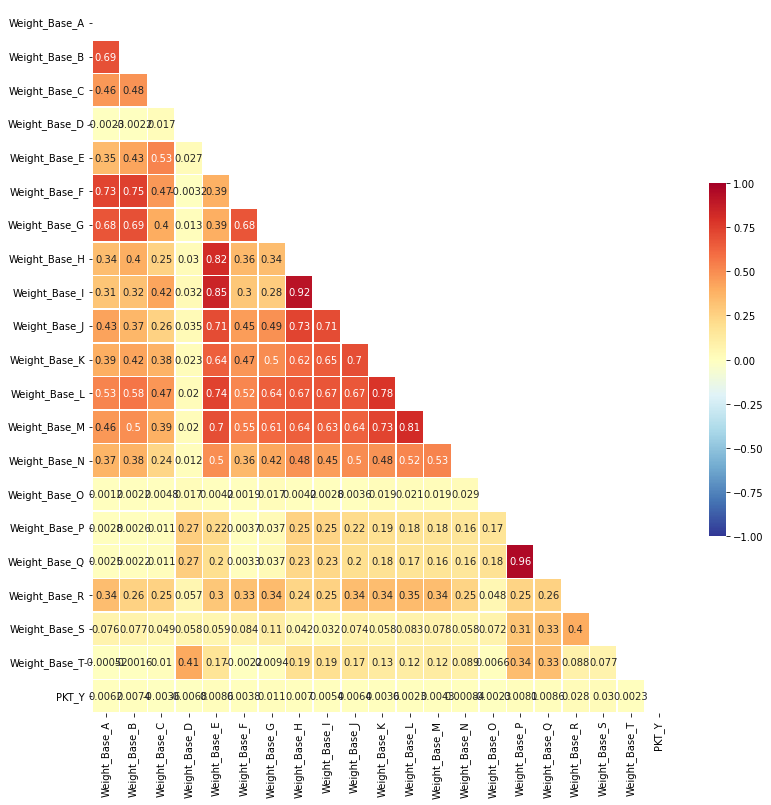

In [114]:
df = pd.concat([df_train.loc[:, 'Weight_Base_A':'Weight_Base_T'], df_train['PKT_Y']], axis = 1)

corr = df.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize  = (13, 13))
sns.heatmap(corr, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            mask = mask,
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )

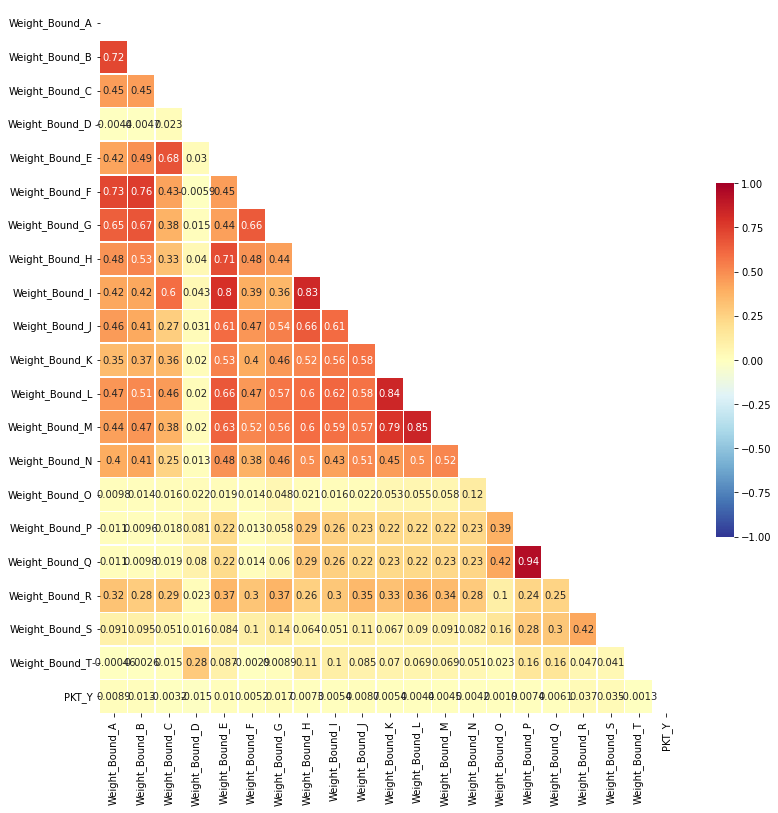

In [115]:
df = pd.concat([df_train.loc[:, 'Weight_Bound_A':'Weight_Bound_T'], df_train['PKT_Y']], axis = 1)

corr = df.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize  = (13, 13))
sns.heatmap(corr, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            mask = mask,
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )

Hyperparameter

In [ ]:
PARAMETERS={"objective":'binary:logistic',"eval_metric":"auc"}
xgb_helper(PARAMETERS)

In [ ]:
housing_dmatrix = xgb.DMatrix(data=X_train, label=y_train)

Number of Rounds

In [ ]:
params = {"objective":"binary:logistic", "max_depth":5}
num_rounds = [5, 10, 15, 20, 25]
final_rmse_per_round = []

for curr_num_rounds in num_rounds:

    cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=5, num_boost_round=curr_num_rounds, metrics="auc", as_pandas=True, seed=123)
    
    final_rmse_per_round.append(cv_results["test-auc-mean"].tail().values[-1])

num_rounds_rmses = list(zip(num_rounds, final_rmse_per_round))
print(pd.DataFrame(num_rounds_rmses,columns=["num_boosting_rounds","auc"]))

In [ ]:
METERS={"objective":'binary:logistic',"eval_metric":"auc","learning_rate": 0.5}
xgb_helper(PARAMETERS)

Max Depth

In [93]:
PARAMETERS={"objective":'binary:logistic',"eval_metric":"auc","learning_rate": 0.5}
V_PARAM_NAME="max_depth"
V_PARAM_VALUES=range(3,10,1)

data=xgb_helper(PARAMETERS,V_PARAM_NAME=V_PARAM_NAME,V_PARAM_VALUES=V_PARAM_VALUES);

KeyboardInterrupt: ignored

min_child_weight

In [ ]:
PARAMETERS={"objective":'binary:logistic',"eval_metric":"auc","learning_rate": 0.5,"max_depth":5}
V_PARAM_NAME="min_child_weight"
V_PARAM_VALUES=range(0,5,1)

data=xgb_helper(PARAMETERS,V_PARAM_NAME=V_PARAM_NAME,V_PARAM_VALUES=V_PARAM_VALUES);

   min_child_weight                                       auc
0                 0           (0.9196684000000002, 0.9146516)
1                 1           (0.9195664000000001, 0.9147318)
2                 2                    (0.9195046, 0.9148068)
3                 3  (0.9196032000000001, 0.9148532000000001)
4                 4                     (0.919481, 0.9147012)


gammga

In [ ]:
PARAMETERS={"objective":'binary:logistic',"eval_metric":"auc","learning_rate": 0.5,"max_depth":5,"min_child_weight":1}
V_PARAM_NAME = "gamma"
V_PARAM_VALUES = [0.1,0.2,0.5,1,1.5,2]

data=xgb_helper(PARAMETERS,V_PARAM_NAME=V_PARAM_NAME,V_PARAM_VALUES=V_PARAM_VALUES);

   gamma                                       auc
0    0.1                    (0.9195656, 0.9147316)
1    0.2  (0.9195626000000001, 0.9147383999999998)
2    0.5  (0.9195475999999999, 0.9147131999999999)
3    1.0           (0.9195362000000001, 0.9147062)
4    1.5            (0.919511, 0.9147358000000001)
5    2.0                    (0.9194678, 0.9147714)


subsample

In [ ]:
PARAMETERS={"objective":'binary:logistic',"eval_metric":"auc","learning_rate": 0.5,"max_depth":5,"min_child_weight":1,"gamma":1}
V_PARAM_NAME = "subsample"
V_PARAM_VALUES = [.4,.5,.6,.7,.8,.9]

data=xgb_helper(PARAMETERS,V_PARAM_NAME=V_PARAM_NAME,V_PARAM_VALUES=V_PARAM_VALUES);

   subsample                                       auc
0        0.4           (0.9174258, 0.9140992000000001)
1        0.5            (0.917651, 0.9140505999999998)
2        0.6           (0.9182214, 0.9138037999999999)
3        0.7           (0.9192072, 0.9148871999999999)
4        0.8  (0.9191779999999999, 0.9146016000000001)
5        0.9            (0.9189852000000001, 0.914508)


colsample_bytree

In [ ]:
PARAMETERS={"objective":'binary:logistic',"eval_metric":"auc","learning_rate": 0.5,"max_depth":5,"min_child_weight":1,"gamma":1,"subsample":0.7}
V_PARAM_NAME = "colsample_bytree"
V_PARAM_VALUES = [.4,.5,.6,.7,.8,.9]

data=xgb_helper(PARAMETERS,V_PARAM_NAME=V_PARAM_NAME,V_PARAM_VALUES=V_PARAM_VALUES);

   colsample_bytree                                       auc
0               0.4  (0.9107202000000001, 0.9065162000000001)
1               0.5            (0.9122868000000001, 0.907639)
2               0.6                    (0.9141416, 0.9092298)
3               0.7                    (0.9165984, 0.9119408)
4               0.8  (0.9179997999999999, 0.9134422000000001)
5               0.9           (0.9182772, 0.9132241999999999)


scale_pos_weight

In [ ]:
PARAMETERS={"objective":'binary:logistic',"eval_metric":"auc","learning_rate": 0.5,"max_depth":5,"min_child_weight":1,
            "gamma":1,"subsample":0.7,"colsample_bytree":.7}

V_PARAM_NAME = "scale_pos_weight"
V_PARAM_VALUES = [.5,1,2]

data=xgb_helper(PARAMETERS,V_PARAM_NAME=V_PARAM_NAME,V_PARAM_VALUES=V_PARAM_VALUES);

   scale_pos_weight                                       auc
0               0.5  (0.9103237999999999, 0.9071199999999999)
1               1.0                    (0.9165984, 0.9119408)
2               2.0  (0.9196857999999999, 0.9142743999999998)


reg_alpha

In [ ]:
PARAMETERS={"objective":'binary:logistic',"eval_metric":"auc","learning_rate": 0.5,"max_depth":5,"min_child_weight":1,
            "gamma":1,"subsample":0.7,"colsample_bytree":.8, "scale_pos_weight":0.5}

V_PARAM_NAME = "reg_alpha"
V_PARAM_VALUES = np.linspace(start=0.001, stop=1, num=20).tolist()

data=xgb_helper(PARAMETERS,V_PARAM_NAME=V_PARAM_NAME,V_PARAM_VALUES=V_PARAM_VALUES);

    reg_alpha                                       auc
0    0.001000            (0.9104829999999999, 0.906868)
1    0.053579           (0.9103038, 0.9063983999999999)
2    0.106158           (0.9102851999999999, 0.9063994)
3    0.158737                    (0.9103382, 0.9064102)
4    0.211316                    (0.9103064, 0.9064262)
5    0.263895  (0.9102536000000001, 0.9064437999999999)
6    0.316474            (0.910224, 0.9063675999999999)
7    0.369053                    (0.9099914, 0.9061968)
8    0.421632  (0.9099015999999999, 0.9061606000000001)
9    0.474211  (0.9098881999999999, 0.9061830000000001)
10   0.526789  (0.9097261999999999, 0.9060701999999999)
11   0.579368           (0.9097234000000001, 0.9061252)
12   0.631947           (0.9098336, 0.9062217999999997)
13   0.684526           (0.9095523999999999, 0.9059958)
14   0.737105            (0.9094555999999999, 0.905896)
15   0.789684           (0.9094010000000001, 0.9059106)
16   0.842263           (0.9089217999999999, 0.9

reg_lambda

In [ ]:
PARAMETERS={"objective":'binary:logistic',"eval_metric":"auc","learning_rate": 0.5,"max_depth":5,"min_child_weight":1,
            "gamma":1,"subsample":0.7,"colsample_bytree":.8, "scale_pos_weight":1,"reg_alpha":0.15}

V_PARAM_NAME = "reg_lambda"
V_PARAM_VALUES = np.linspace(start=0.001, stop=1, num=20).tolist()

data=xgb_helper(PARAMETERS,V_PARAM_NAME=V_PARAM_NAME,V_PARAM_VALUES=V_PARAM_VALUES);

    reg_lambda                                       auc
0     0.001000  (0.9183566000000001, 0.9132821999999999)
1     0.053579           (0.9182914, 0.9132659999999999)
2     0.106158           (0.9182931999999999, 0.9133288)
3     0.158737                    (0.9182326, 0.9133104)
4     0.211316  (0.9182180000000001, 0.9133587999999999)
5     0.263895           (0.9182195999999999, 0.9133856)
6     0.316474           (0.9181978000000001, 0.9133148)
7     0.369053  (0.9181838000000001, 0.9134298000000001)
8     0.421632                     (0.918185, 0.9134882)
9     0.474211            (0.918182, 0.9134819999999999)
10    0.526789  (0.9182196000000001, 0.9135479999999999)
11    0.579368  (0.9181904000000001, 0.9135819999999999)
12    0.631947            (0.9181102000000001, 0.913471)
13    0.684526                     (0.9181092, 0.913485)
14    0.737105  (0.9180480000000001, 0.9134191999999999)
15    0.789684           (0.9179919999999999, 0.9134008)
16    0.842263           (0.917

learning_rate

In [ ]:
PARAMETERS={"objective":'binary:logistic',"eval_metric":"auc","max_depth":5,"min_child_weight":1,
            "gamma":1,"subsample":0.7,"colsample_bytree":.8, "scale_pos_weight":1,"reg_alpha":0.15,
           "reg_lambda":0.5}

V_PARAM_NAME = "learning_rate"
V_PARAM_VALUES = np.linspace(start=0.01, stop=0.3, num=10).tolist()

data=xgb_helper(PARAMETERS,V_PARAM_NAME=V_PARAM_NAME,V_PARAM_VALUES=V_PARAM_VALUES);

KeyboardInterrupt: ignored

Final Parameter

In [125]:
PARAMETERS={"objective":'binary:logistic',"eval_metric":"auc","max_depth":4,"min_child_weight":1,
            "gamma":1,"subsample":0.7,"colsample_bytree":.7, "scale_pos_weight":0.5,"reg_alpha":0.15,
           "reg_lambda":0.5,"learning_rate": 0.3}

Final Model

In [67]:
## Final Model
clf = xgb.XGBClassifier(tree_method="gpu_hist", objective="binary:logistic", eval_metric="auc", max_depth = 5, min_child_weight = 1,
            gamma=1,subsample=0.7,colsample_bytree=.7, scale_pos_weight=0.5,reg_alpha=0.15,
           reg_lambda=0.5, learning_rate= 0.3, n_estimators=1000)

clf.fit(X_train, y_train)

XGBClassifier(colsample_bytree=0.7, eval_metric='auc', gamma=1,
              learning_rate=0.3, max_depth=5, n_estimators=1000, reg_alpha=0.15,
              reg_lambda=0.5, scale_pos_weight=0.5, subsample=0.7,
              tree_method='gpu_hist')

In [68]:
y_predicted = clf.predict(X_test)

              precision    recall  f1-score   support

           0       0.64      0.73      0.68      1000
           1       0.68      0.58      0.63      1000

    accuracy                           0.66      2000
   macro avg       0.66      0.66      0.65      2000
weighted avg       0.66      0.66      0.65      2000

0.6559999999999999
F-beta Score
0.601317957166392


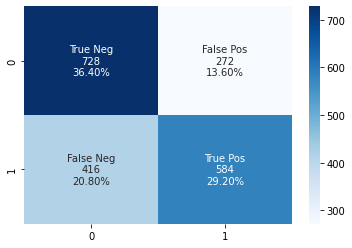

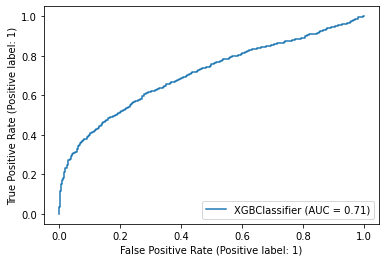

In [69]:
result(clf, X_test, y_test, y_predicted)

Test Ground

In [70]:
## weight > 40 , 20 , weight > 20, 10, else 0
error = pd.concat([pd.DataFrame(y_test), pd.DataFrame(y_predicted)], axis = 1, ignore_index = True)
error.columns = ['test', 'pred']
error_df = pd.concat([X_test, error], axis = 1)
error_df['define'] = error_df['test'] + error_df['pred']
error_e = error_df[error_df['define'] == 1]
error_0 = error_e[error_e['test'] == 0]
error_1 = error_e[error_e['test'] == 1]
print(error_e.shape[0], error_0.shape[0], error_1.shape[0])

688 272 416


In [11]:
## weight normal
error = pd.concat([pd.DataFrame(y_test), pd.DataFrame(y_predicted)], axis = 1, ignore_index = True)
error.columns = ['test', 'pred']
error_df = pd.concat([X_test, error], axis = 1)
error_df['define'] = error_df['test'] + error_df['pred']
error_e = error_df[error_df['define'] == 1]
error_0 = error_e[error_e['test'] == 0]
error_1 = error_e[error_e['test'] == 1]
print(error_e.shape[0], error_0.shape[0], error_1.shape[0])

743 267 476


In [26]:
## weight > 20 , 10 else 0
error = pd.concat([pd.DataFrame(y_test), pd.DataFrame(y_predicted)], axis = 1, ignore_index = True)
error.columns = ['test', 'pred']
error_df = pd.concat([X_test, error], axis = 1)
error_df['define'] = error_df['test'] + error_df['pred']
error_e = error_df[error_df['define'] == 1]
error_0 = error_e[error_e['test'] == 0]
error_1 = error_e[error_e['test'] == 1]
print(error_e.shape[0], error_0.shape[0], error_1.shape[0])

738 272 466


In [71]:
submit(clf, df_test)